In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/sbnd/app/users/brindenc/mypython') #My utils path
from bc_utils.pmtutils import pic as pmtpic
from bc_utils.pmtutils import plotters as pmtplotters
from bc_utils.hitutils import pic as hitpic
from bc_utils.hitutils import plotters as hitplotters
from bc_utils.utils import pic,plotters
import uproot
import pandas as pd

In [2]:
plotters.plot_stuff()

In [3]:
#You can also specify a cwd
cwd = os.getcwd()

%load_ext autoreload
%autoreload 2

In [4]:
#Load some pickle files
PE_tpc0_df = pd.read_pickle('data/summedPE_tpc0_df.pkl')
muon_tpc0_df = pd.read_pickle('data/muon_df_tpc0.pkl')
PMT_info = pd.read_pickle('data/PMT_info.pkl')
PMT_info = PMT_info.rename(columns={'ophit_opdet':'ophit_ch'})
PE_tpc0_df.head()
PMT_info.head()

,ophit_ch,ophit_opdet_x,ophit_opdet_y,ophit_opdet_z,ophit_opdet_type,opdet_tpc,opdet_area,f,distance
ophit_opch,,,,,,,,,
6,6,-213.4,-175.0,27.874225,0,0,66.473366,0.000087,304.671003
7,7,213.4,-175.0,27.874225,0,1,66.473366,0.000087,304.671003
8,8,-213.4,-95.0,27.874225,0,0,93.646178,0.000123,266.879036
9,9,213.4,-95.0,27.874225,0,1,93.646178,0.000123,266.879036
10,10,-213.4,-40.0,27.874225,0,0,116.183099,0.000153,252.585471


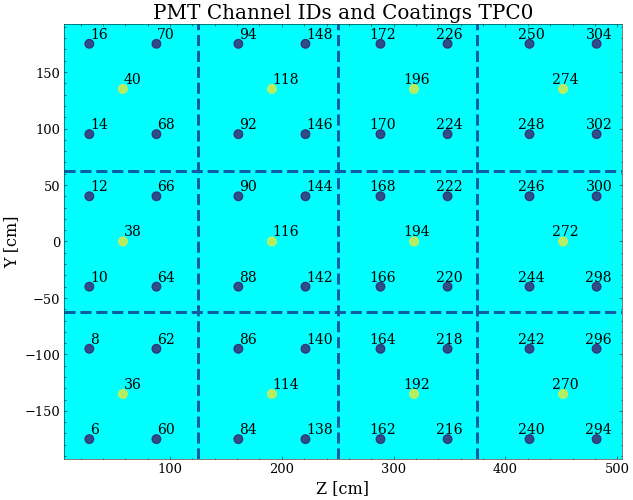

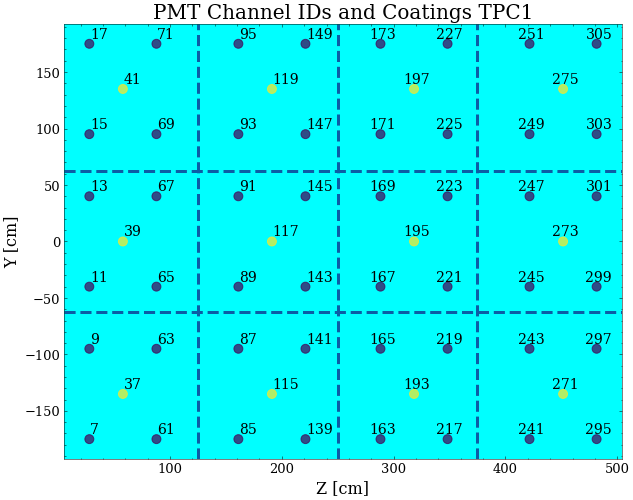

In [10]:
#Make map plots
tpcs = [0,1]
for tpc in tpcs:
  pmtplotters.plot_TPC(tpc,'ophit_opdet_type','PMT Channel IDs and Coatings',PMT_info)

In [9]:
muon_plot_tpc0_df = muon_tpc0_df.drop(['nmuontrks','muontrk_t0'],axis=1)
muon_plot_tpc0_df = pmtpic.get_muon_tracks(muon_plot_tpc0_df)

#muon_plot_tpc0_df = muon_plot_tpc0_df.set_index(['run','subrun','event'])
muon_plot_tpc0_df.head(40)
muon_tpc0_df.head()


nmuontrks  muontrk_t0  muontrk_x1  muontrk_y1  muontrk_z1  \
run subrun event                                                              
1   33     6              1       557.0 -202.050003 -178.314636  345.750000   
    19     4              1      -648.0 -188.690002 -199.792053  484.649994   
           9              1      -999.0 -202.050003 -198.406418  268.950012   
    34     2              1      -999.0 -202.050003  199.792053  308.250000   
    35     10             1      -999.0 -202.050003  199.792053  112.050003   

                  muontrk_x2  muontrk_y2  muontrk_z2  muontrk_theta_xz  \
run subrun event                                                         
1   33     6     -194.610001  199.792053  133.649994        177.991013   
    19     4        0.000000  179.873474  343.049988        174.610077   
           9     -202.050003  199.792053   77.849998        177.171982   
    34     2     -202.050003 -199.099243  504.149994          3.691762   
    35     10    -202.050003 -199.445648  257.549988         10.039877   

                  muontrk_theta_yz  muontrk_tpc  muontrk_type  
run subrun event                                               
1   33     6            119.290367            0             1  
    19     4            110.453499            0             2  
           9            115.636879            0             3  
    34     2            -63.843826            0             3  
    35     10           -69.976006            0             3

(0.0, 500.0)

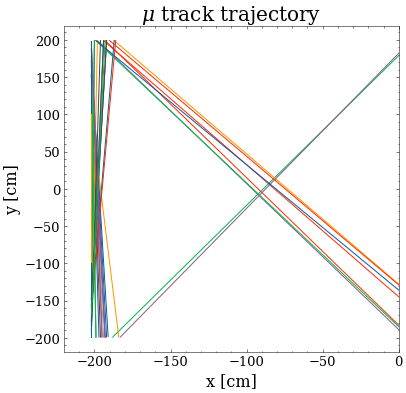

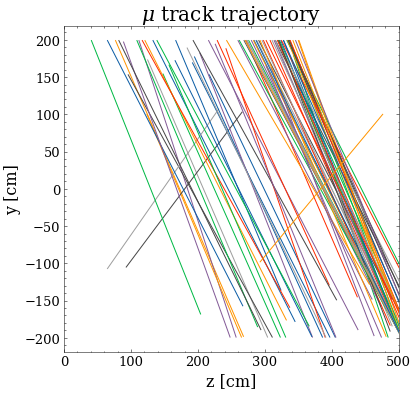

In [7]:
ax,fig = pmtplotters.plot_tracks(muon_plot_tpc0_df,'muontrk_x1_0','muontrk_y1_0','muontrk_x2_0','muontrk_y2_0',
      'muontrk_x1_1','muontrk_y1_1','muontrk_x2_1','muontrk_y2_1')
ax.set_xlim([-220,0])
ax,fig = pmtplotters.plot_tracks(muon_plot_tpc0_df,'muontrk_z1_0','muontrk_y1_0','muontrk_z2_0','muontrk_y2_0',
      'muontrk_z1_1','muontrk_y1_1','muontrk_z2_1','muontrk_y2_1') 
ax.set_xlim([0,500])

/tmp/ipykernel_6673/470216107.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  fig,ax = pmtplotters.plot_TPC(0,'summed_PE',r'PE for $t \in $[0,0.5] $\mu$s'+f'\nSubrun {index[1]}, Event {index[2]}', PE_tpc0_df.loc[index])


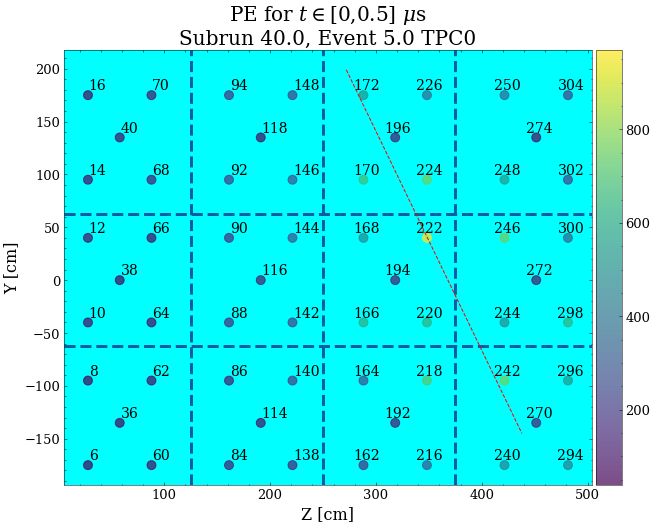

In [35]:
index = PE_tpc0_df.index.drop_duplicates()[10]

fig,ax = pmtplotters.plot_TPC(0,'summed_PE',r'PE for $t \in $[0,0.5] $\mu$s'+f'\nSubrun {index[1]}, Event {index[2]}', PE_tpc0_df.loc[index])
ax,fig = pmtplotters.plot_tracks(muon_plot_tpc0_df.loc[index],'muontrk_z1_0','muontrk_y1_0','muontrk_z2_0','muontrk_y2_0',
      'muontrk_z1_1','muontrk_y1_1','muontrk_z2_1','muontrk_y2_1',ax=ax,fig=fig,indeces=[index])

Q vs z

In [4]:
hit_tpc0_df = pd.read_pickle('data/hit_df_tpc0.pkl')
hit_tpc0_df.head()

nhits  hit_cryostat  hit_tpc  hit_plane  hit_wire  \
run subrun event                                                      
1   1      1       3096             0        0          0       621   
           1       3096             0        0          0       622   
           1       3096             0        0          0       623   
           1       3096             0        0          0       624   
           1       3096             0        0          0       625   

                  hit_channel  hit_peakT  hit_charge  hit_ph  hit_width  \
run subrun event                                                          
1   1      1              621    1692.50       236.0    34.0        5.0   
           1              622    1690.50       284.0    43.0        5.0   
           1              623    1693.00       337.0    50.0        5.0   
           1              624    1693.00       297.0    46.0        5.0   
           1              625    1692.75       271.0    42.0        5.0   

                  hit_full_integral  
run subrun event                     
1   1      1                -9999.0  
           1                -9999.0  
           1                -9999.0  
           1                -9999.0  
           1                -9999.0

In [5]:
index = hit_tpc0_df.index.drop_duplicates()[0]
bw = 20
bincenters,yvals,title = hitpic.get_xy_bins(hit_tpc0_df,'hit_wire','hit_charge',index,10,tpc=0,plane=2)

/nashome/b/brindenc/.local/lib/python3.9/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


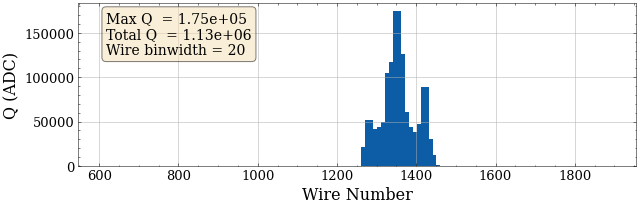

In [6]:
ax,fig = hitplotters.make_bar_scatter_plot(bincenters,yvals,bw,title='')

For PE vs. time stuff

In [3]:
#Import root files
tree_tpc0 = uproot.open(cwd+'/data/hitdumper_tb0.root:hitdumper/hitdumpertree;1')
tree_tpc1 = uproot.open(cwd+'/data/hitdumper_tb1.root:hitdumper/hitdumpertree;1')
keys = tree_tpc0.keys() #they have the same keys, don't worry


#Get op,crt,muon info
run_info_keys = ['run','subrun','event']

opkeys = [key for key in keys if 'op' in key]
opkeys.extend(run_info_keys)
crtkeys = [key for key in keys if 'crt' in key]
crtkeys.extend(run_info_keys)
ctrkkeys = [key for key in keys if 'ctrk' in key]
ctrkkeys.extend(run_info_keys)
muonkeys = [key for key in keys if 'muon' in key]
muonkeys.extend(run_info_keys)

In [4]:
op_df_tpc0 = tree_tpc0.arrays(opkeys,library='pd')
op_df_tpc0 = op_df_tpc0.set_index(run_info_keys)
op_df_tpc1 = tree_tpc1.arrays(opkeys,library='pd')
op_df_tpc1 = op_df_tpc1.set_index(run_info_keys)

crt_df_tpc0 = tree_tpc0.arrays(crtkeys,library='pd')
crt_df_tpc0 = crt_df_tpc0.set_index(run_info_keys)
crt_df_tpc1 = tree_tpc1.arrays(crtkeys,library='pd')
crt_df_tpc1 = crt_df_tpc1.set_index(run_info_keys)

ctrk_df_tpc0 = tree_tpc0.arrays(ctrkkeys,library='pd')
ctrk_df_tpc0 = ctrk_df_tpc0.set_index(run_info_keys)
ctrk_df_tpc1 = tree_tpc1.arrays(ctrkkeys,library='pd')
ctrk_df_tpc1 = ctrk_df_tpc1.set_index(run_info_keys)

muon_df_tpc0 = tree_tpc0.arrays(muonkeys,library='pd')
muon_df_tpc0 = muon_df_tpc0.set_index(run_info_keys)
muon_df_tpc1 = tree_tpc1.arrays(muonkeys,library='pd')
muon_df_tpc1 = muon_df_tpc1.set_index(run_info_keys)

In [12]:
#Add tpc info to op info
op_df_tpc0.loc[:,'op_tpc'] = op_df_tpc0.loc[:,'ophit_opch'].values%2 #if the channel is odd, the tpc is 1, this works out nicely
op_df_tpc1.loc[:,'op_tpc'] = op_df_tpc1.loc[:,'ophit_opch'].values%2


In [82]:
op_df_tpc0.index.drop_duplicates()[1]

(1, 19, 4)

In [20]:
op_df_tpc0.head()
#muon_df_tpc0.head()

nophits  ophit_opch  ophit_opdet  ophit_peakT  ophit_width  \
run subrun event                                                               
1   33     6         3682           6            6        0.260        0.146   
           6         3682           6            6        0.404        0.032   
           6         3682           6            6        0.436        0.070   
           6         3682           6            6        0.526        0.044   
           6         3682           6            6        0.594        0.036   

                   ophit_area  ophit_amplitude   ophit_pe  ophit_opdet_x  \
run subrun event                                                           
1   33     6      3135.739424       172.252105  47.274828         -213.4   
           6       108.336333        12.210333   1.633293         -213.4   
           6       309.253581        28.251859   4.662348         -213.4   
           6        49.929914         9.189564   0.752750         -213.4   
           6       252.914865        30.096847   3.812978         -213.4   

                  ophit_opdet_y  ophit_opdet_z  ophit_opdet_type  op_tpc  
run subrun event                                                          
1   33     6             -175.0      27.874225                 0       0  
           6             -175.0      27.874225                 0       0  
           6             -175.0      27.874225                 0       0  
           6             -175.0      27.874225                 0       0  
           6             -175.0      27.874225                 0       0

/nashome/b/brindenc/.local/lib/python3.9/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


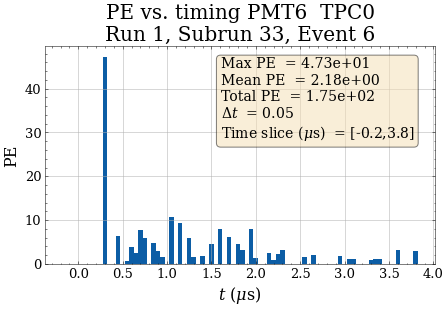

In [83]:
bw=0.05
pmt = 6
tpc = 0
bincenters,yvals,title = pmtplotters.get_xy_bins(op_df_tpc0,'ophit_peakT','ophit_pe',(1,33,6),bw,pmt=pmt,tpc=tpc)
ax,fig = pmtplotters.make_bar_scatter_plot(bincenters,yvals,bw,title=title,
        nleft=-320,nright=400)
ax.grid()
plotters.save_plot(f'pe_time_pmt{pmt}_tpc{tpc}_bw1')

In [85]:
boolean_array = np.logical_and(bincenters >= -1, bincenters <= 8)
np.where(boolean_array)[0]

array([29906, 29907, 29908, 29909, 29910, 29911, 29912, 29913, 29914,
       29915, 29916, 29917, 29918, 29919, 29920, 29921, 29922, 29923,
       29924, 29925, 29926, 29927, 29928, 29929, 29930, 29931, 29932,
       29933, 29934, 29935, 29936, 29937, 29938, 29939, 29940, 29941,
       29942, 29943, 29944, 29945, 29946, 29947, 29948, 29949, 29950,
       29951, 29952, 29953, 29954, 29955, 29956, 29957, 29958, 29959,
       29960, 29961, 29962, 29963, 29964, 29965, 29966, 29967, 29968,
       29969, 29970, 29971, 29972, 29973, 29974, 29975, 29976, 29977,
       29978, 29979, 29980, 29981, 29982, 29983, 29984, 29985, 29986,
       29987, 29988, 29989, 29990, 29991, 29992, 29993, 29994, 29995,
       29996, 29997, 29998, 29999, 30000, 30001, 30002, 30003, 30004,
       30005, 30006, 30007, 30008, 30009, 30010, 30011, 30012, 30013,
       30014, 30015, 30016, 30017, 30018, 30019, 30020, 30021, 30022,
       30023, 30024, 30025, 30026, 30027, 30028, 30029, 30030, 30031,
       30032, 30033,

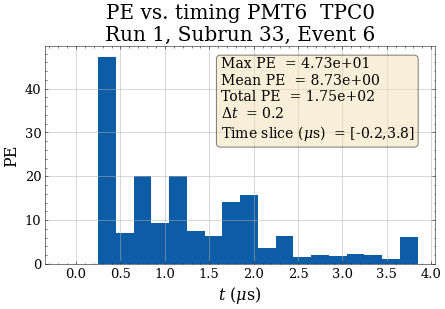

In [68]:
bw=0.2
pmt = 6
tpc = 0
bincenters,yvals,title = pmtplotters.get_xy_bins(op_df_tpc0,'ophit_peakT','ophit_pe',(1,33,6),bw,pmt=pmt,tpc=tpc)
ax,fig = pmtplotters.make_bar_scatter_plot(bincenters,yvals,bw,title=title,
        nleft=-80,nright=100)
ax.grid()
plotters.save_plot(f'pe_time_pmt{pmt}_tpc{tpc}_bw2')

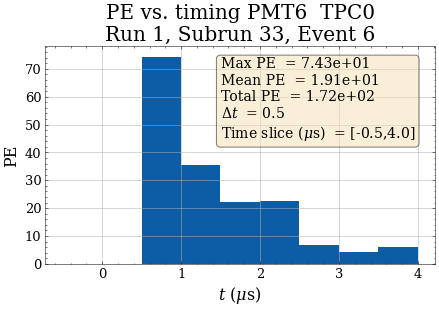

In [75]:
bw=0.5
pmt = 6
tpc = 0
bincenters,yvals,title = pmtplotters.get_xy_bins(op_df_tpc0,'ophit_peakT','ophit_pe',(1,33,6),bw,pmt=pmt,tpc=tpc)
ax,fig = pmtplotters.make_bar_scatter_plot(bincenters,yvals,bw,title=title,
        nleft=-31,nright=40)
ax.grid()
plotters.save_plot(f'pe_time_pmt{pmt}_tpc{tpc}_bw3')

In [ ]:
nleft=-30
nright=50
bincenters_trunc = pic.get_central_arr(bincenters,nleft,nright=nright)
yvals_trunc = pic.get_central_arr(yvals,nleft,nright=nright)

In [62]:
bincenters_trunc,yvals_trunc

(array([-0.752, -0.252,  0.248,  0.748,  1.248,  1.748,  2.248,  2.748,
         3.248,  3.748,  4.248,  4.748,  5.248,  5.748,  6.248,  6.748,
         7.248,  7.748,  8.248,  8.748]),
 array([0.00000000e+00, 0.00000000e+00, 1.38618969e+04, 2.78974306e+03,
        3.27692604e+03, 3.17008750e+03, 2.08446838e+03, 1.55144551e+03,
        1.06238298e+03, 7.26634706e+02, 5.09832627e+02, 2.90844693e+02,
        2.18005178e+02, 1.60852447e+02, 1.17761049e+02, 8.83137301e+01,
        3.95917230e+01, 1.67855384e+01, 2.21214793e+01, 6.21728267e+00]))

<BarContainer object of 20 artists>

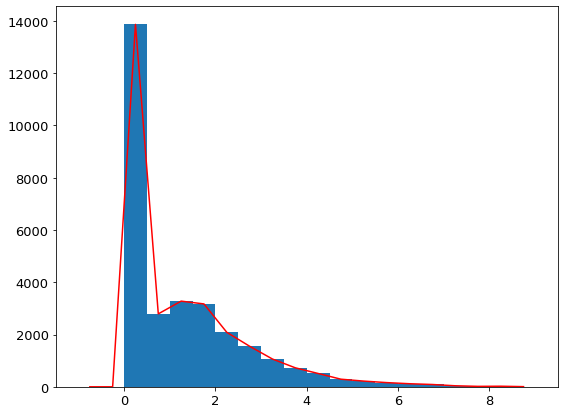

In [63]:
plt.plot(bincenters_trunc,yvals_trunc,c='r')
plt.bar(bincenters_trunc,yvals_trunc,width=bw)
#plt.yscale('log')
#plt.xlim([-5*bw,10*bw])
#plt.grid()

In [92]:
pmts = pd.read_pickle('data/PMT_info.pkl')
pmts.head()
pmts[pmts.loc[:,'ophit_opdet'] == 6].loc[:,'ophit_opdet_type'].drop_duplicates().values[0]

0